# **Rachma Indira - DS0218**

# Imporrt dataset dan library

In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
data = pd.read_csv('bank.csv')

In [3]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Proses encode

In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [5]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
data['job'] =le1.fit_transform(data['job'])
data['marital'] =le1.fit_transform(data['marital'])
data['education'] =le1.fit_transform(data['education'])
data['default'] =le1.fit_transform(data['default'])
data['housing'] =le1.fit_transform(data['housing'])
data['loan'] =le1.fit_transform(data['loan'])
data['contact'] =le1.fit_transform(data['contact'])
data['month'] =le1.fit_transform(data['month'])
data['poutcome'] =le1.fit_transform(data['poutcome'])
data['deposit'] =le1.fit_transform(data['deposit'])

# Data Exploration

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
data.desc

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [9]:
data.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d56f27710>,
      dtype=object)

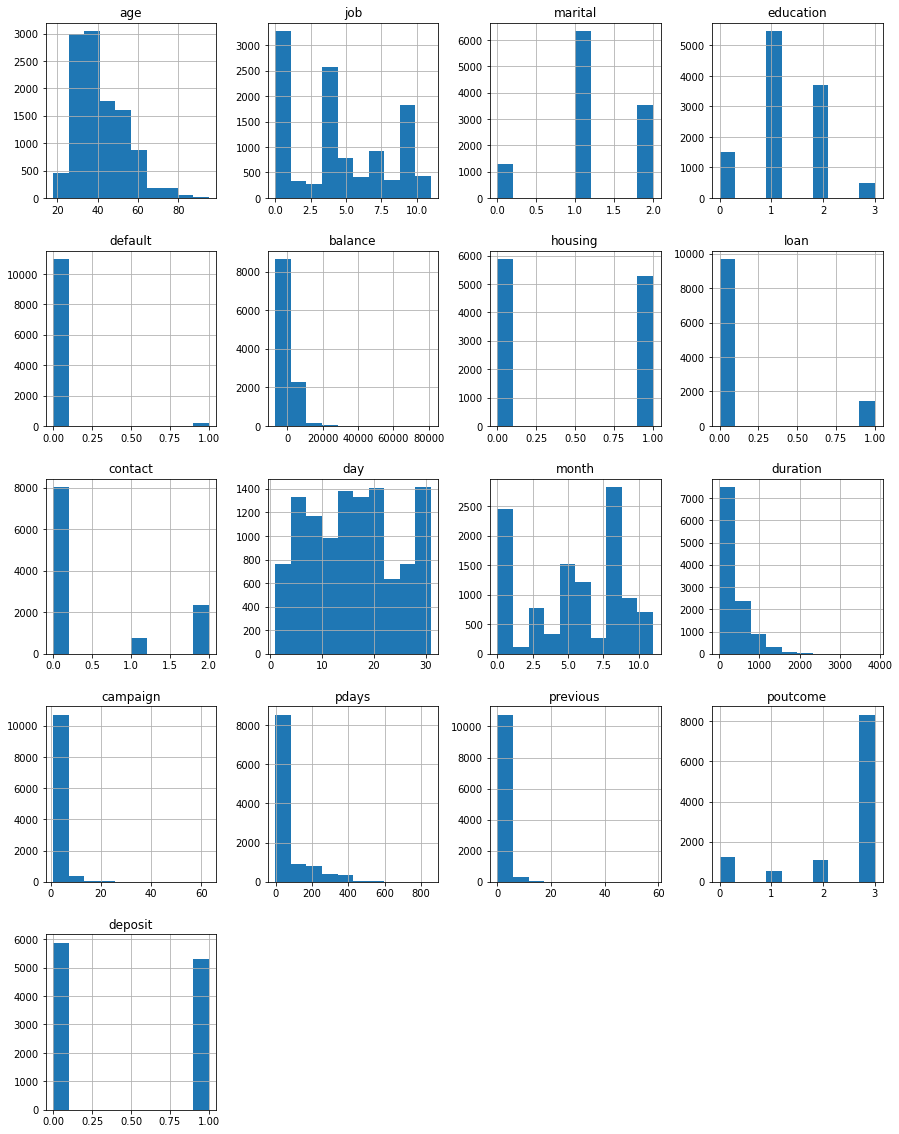

In [15]:
import matplotlib.pyplot as plt
# data.hist()

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,1.000000,-0.031603,-0.442782,-0.126018,-0.011425,0.112300,-0.168700,-0.031418,0.027762,-0.000762,-0.026130,0.000189,-0.005278,0.002774,0.020169,-0.002699,0.034901
job,-0.031603,1.000000,0.078314,0.147046,-0.007066,0.028736,-0.136965,-0.067092,-0.087915,0.026589,-0.076011,0.002432,0.003104,-0.003385,0.012665,-0.004238,0.063395
marital,-0.442782,0.078314,1.000000,0.125845,-0.014691,-0.002138,-0.036345,-0.062029,-0.060456,-0.003642,-0.004070,0.006781,-0.030794,0.031200,0.031281,-0.039424,0.067610
education,-0.126018,0.147046,0.125845,1.000000,-0.010709,0.051728,-0.109168,-0.073154,-0.132540,0.016759,-0.055868,-0.019122,-0.005327,0.025165,0.022427,-0.040262,0.095948
default,-0.011425,-0.007066,-0.014691,-0.010709,1.000000,-0.060954,0.011076,0.076434,0.035709,0.017342,0.000950,-0.009760,0.030975,-0.036282,-0.035273,0.042357,-0.040680
balance,0.112300,0.028736,-0.002138,0.051728,-0.060954,1.000000,-0.077092,-0.084589,-0.027295,0.010467,0.007264,0.022436,-0.013894,0.017411,0.030805,-0.027151,0.081129
housing,-0.168700,-0.136965,-0.036345,-0.109168,0.011076,-0.077092,1.000000,0.076761,0.226392,-0.014770,0.219602,0.035051,0.006660,0.064497,-0.000840,-0.046370,-0.203888
loan,-0.031418,-0.067092,-0.062029,-0.073154,0.076434,-0.084589,0.076761,1.000000,0.006829,0.017269,0.025329,-0.001914,0.034722,-0.030416,-0.022668,0.026344,-0.110580
contact,0.027762,-0.087915,-0.060456,-0.132540,0.035709,-0.027295,0.226392,0.006829,1.000000,0.007943,0.289803,-0.018000,0.059258,-0.227785,-0.169919,0.257993,-0.249847
day,-0.000762,0.026589,-0.003642,0.016759,0.017342,0.010467,-0.014770,0.017269,0.007943,1.000000,-0.019840,-0.018511,0.137007,-0.077232,-0.058981,0.080221,-0.056326


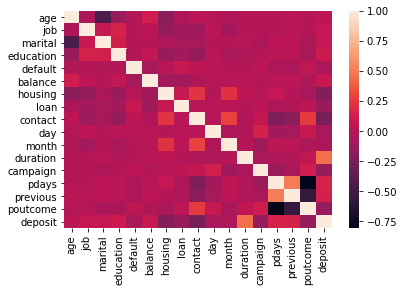

In [12]:
sns.heatmap(data.corr());

In [16]:
data.pop("default")
data.pop("housing")
data.pop("contact")
data.pop("day")
data.pop("month")

0        8
1        8
2        8
3        8
4        8
        ..
11157    0
11158    6
11159    1
11160    8
11161    5
Name: month, Length: 11162, dtype: int64

In [17]:
data.head(5)

,age,job,marital,education,balance,loan,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,2343,0,1042,1,-1,0,3,1
1,56,0,1,1,45,0,1467,1,-1,0,3,1
2,41,9,1,1,1270,0,1389,1,-1,0,3,1
3,55,7,1,1,2476,0,579,1,-1,0,3,1
4,54,0,1,2,184,0,673,2,-1,0,3,1


# KNN

In [65]:
# menentukan mana independet kolom dan target kolom(class)
X = data.drop(["deposit"], axis = 1)

In [67]:
Y = data["deposit"]

Maximum accuracy:- 0.7552071668533035 at K = 17


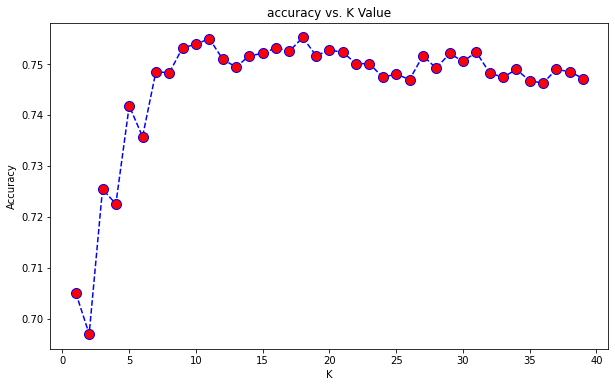

In [68]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=4)

In [73]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred_knn))

0.7525195968645016


In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred_knn))
print(classification_report(Y_test, Y_pred_knn))

[[1841  509]
 [ 596 1519]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2350
           1       0.75      0.72      0.73      2115

    accuracy                           0.75      4465
   macro avg       0.75      0.75      0.75      4465
weighted avg       0.75      0.75      0.75      4465



In [23]:
# Lalu data dipisah menjadi 80% data training dan 20% data testing
# lalu tiap data di  X dan Y dipisah menjadi data training dan testing

# train_pct_index = int(0.8 * len(X))
# X_train, X_test = X[:train_pct_index], X[train_pct_index:]
# Y_train, Y_test = Y[:train_pct_index], Y[train_pct_index:]

In [51]:
# Ditahap ini dilakukan fit antara independet kolom(train dan test) dengan library 

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [37]:
# Lalu dilakukan pemodelan dengan KNN

# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors=2)
# classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [38]:
# Y_pred_KNN = classifier.predict(X_test)

In [39]:
#menampilkan confusion matriks dari hasil prediksi dan nilai akurasi

# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(Y_test, Y_pred_KNN))
# print(classification_report(Y_test, Y_pred_KNN))

[[1829  404]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      2233
           1       0.00      0.00      0.00         0

    accuracy                           0.82      2233
   macro avg       0.50      0.41      0.45      2233
weighted avg       1.00      0.82      0.90      2233



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# DECISION TREE

In [75]:
# Import Module
from sklearn import tree

# Modeling Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(X_train, Y_train)

# Predict to Test Data 
Y_pred_dtc = dtc.predict(X_test)

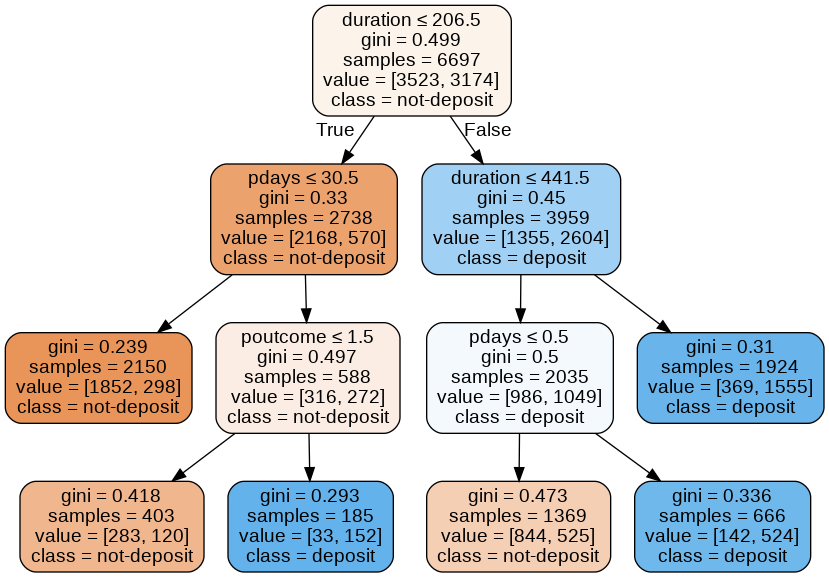

In [76]:
# Visualize Tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['not-deposit', 'deposit'],
                feature_names=['age', 'job',	'marital', 'education',
                               'balance',	'loan','duration', 'campaign', 'pdays',
                               'previous', 'poutcome'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [77]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
cm_dtc = metrics.confusion_matrix(Y_test, Y_pred_dtc)
cm_dtc

array([[1969,  381],
       [ 663, 1452]])

In [78]:
# Show the Accuracy, Precision, Recall
acc_dtc = metrics.accuracy_score(Y_test, Y_pred_dtc)
prec_dtc = metrics.precision_score(Y_test, Y_pred_dtc)
rec_dtc = metrics.recall_score(Y_test, Y_pred_dtc)
f1_dtc = metrics.f1_score(Y_test, Y_pred_dtc)
kappa_dtc = metrics.cohen_kappa_score(Y_test, Y_pred_dtc)

print("Accuracy:", acc_dtc)
print("Precision:", prec_dtc)
print("Recall:", rec_dtc)
print("F1 Score:", f1_dtc)
print("Cohens Kappa Score:", kappa_dtc)

Accuracy: 0.7661814109742441
Precision: 0.7921440261865794
Recall: 0.6865248226950355
F1 Score: 0.7355623100303952
Cohens Kappa Score: 0.5279166071683564


# Naive Bayes

In [79]:
# Import Module
from sklearn.naive_bayes import GaussianNB 

# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

# Predict to Test Data
Y_pred_gnb= gnb.predict(X_test)

In [80]:
# Show the Confussion Matrix
cm_gnb = metrics.confusion_matrix(Y_test, Y_pred_gnb)
cm_gnb

array([[1843,  507],
       [ 776, 1339]])

In [81]:
# Show the Accuracy, Precision, Recall
acc_gnb = metrics.accuracy_score(Y_test, Y_pred_gnb)
prec_gnb = metrics.precision_score(Y_test, Y_pred_gnb)
rec_gnb = metrics.recall_score(Y_test, Y_pred_gnb)
f1_gnb = metrics.f1_score(Y_test, Y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(Y_test, Y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.7126539753639418
Precision: 0.7253521126760564
Recall: 0.633096926713948
F1 Score: 0.6760918959858622
Cohens Kappa Score: 0.4200233161238134


# Random Forest

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [96]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [97]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, Y_train)
y_pred_RF = regressor.predict(X_test)

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(Y_test ,y_pred_RF.round()))
print(classification_report(Y_test,y_pred_RF.round()))
print(accuracy_score(Y_test, y_pred_RF.round()))

[[970 235]
 [238 790]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1205
           1       0.77      0.77      0.77      1028

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233

0.7881773399014779
